In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/march-machine-learning-mania-2025/Conferences.csv
/kaggle/input/march-machine-learning-mania-2025/SeedBenchmarkStage1.csv
/kaggle/input/march-machine-learning-mania-2025/WNCAATourneyDetailedResults.csv
/kaggle/input/march-machine-learning-mania-2025/WRegularSeasonCompactResults.csv
/kaggle/input/march-machine-learning-mania-2025/MNCAATourneySeedRoundSlots.csv
/kaggle/input/march-machine-learning-mania-2025/MRegularSeasonDetailedResults.csv
/kaggle/input/march-machine-learning-mania-2025/MNCAATourneyCompactResults.csv
/kaggle/input/march-machine-learning-mania-2025/MGameCities.csv
/kaggle/input/march-machine-learning-mania-2025/WSecondaryTourneyCompactResults.csv
/kaggle/input/march-machine-learning-mania-2025/WGameCities.csv
/kaggle/input/march-machine-learning-mania-2025/MSeasons.csv
/kaggle/input/march-machine-learning-mania-2025/WNCAATourneySlots.csv
/kaggle/input/march-machine-learning-mania-2025/MSecondaryTourneyTeams.csv
/kaggle/input/march-machine-learning-mania-20

## Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the men's team spellings dataset
path = '/kaggle/input/march-machine-learning-mania-2025/'
# Load the men's team spellings dataset
MTeamSpellings = pd.read_csv(path + 'MTeamSpellings.csv', encoding='cp1252', encoding_errors='ignore')

# Load the women's team spellings dataset
WTeamSpellings = pd.read_csv(path + 'WTeamSpellings.csv', encoding='cp1252', encoding_errors='ignore')

# Load the cities dataset
Cities = pd.read_csv(path + 'Cities.csv', encoding='cp1252', encoding_errors='ignore')

# Load the conferences dataset
Conferences = pd.read_csv(path+ 'Conferences.csv', encoding='cp1252', encoding_errors='ignore')

## Explore the Dataset

In [4]:
# View the first few rows of the men's team spellings dataset
MTeamSpellings.head()

# View the first few rows of the women's team spellings dataset
WTeamSpellings.head()

# View the first few rows of the cities dataset
Cities.head()

# View the first few rows of the conferences dataset
Conferences.head()

# Get the shape of each dataset
print("MTeamSpellings shape:", MTeamSpellings.shape)
print("WTeamSpellings shape:", WTeamSpellings.shape)
print("Cities shape:", Cities.shape)
print("Conferences shape:", Conferences.shape)

# Get the column names of each dataset
print("MTeamSpellings columns:", MTeamSpellings.columns)
print("WTeamSpellings columns:", WTeamSpellings.columns)
print("Cities columns:", Cities.columns)
print("Conferences columns:", Conferences.columns)

# Get the data types of each column in each dataset
print("MTeamSpellings data types:\n", MTeamSpellings.dtypes)
print("WTeamSpellings data types:\n", WTeamSpellings.dtypes)
print("Cities data types:\n", Cities.dtypes)
print("Conferences data types:\n", Conferences.dtypes)

MTeamSpellings shape: (1177, 2)
WTeamSpellings shape: (1170, 2)
Cities shape: (502, 3)
Conferences shape: (51, 2)
MTeamSpellings columns: Index(['TeamNameSpelling', 'TeamID'], dtype='object')
WTeamSpellings columns: Index(['TeamNameSpelling', 'TeamID'], dtype='object')
Cities columns: Index(['CityID', 'City', 'State'], dtype='object')
Conferences columns: Index(['ConfAbbrev', 'Description'], dtype='object')
MTeamSpellings data types:
 TeamNameSpelling    object
TeamID               int64
dtype: object
WTeamSpellings data types:
 TeamNameSpelling    object
TeamID               int64
dtype: object
Cities data types:
 CityID     int64
City      object
State     object
dtype: object
Conferences data types:
 ConfAbbrev     object
Description    object
dtype: object


## Data Preprocessing

In [5]:
# Merge the men's and women's team spellings datasets
TeamSpellings = pd.concat([MTeamSpellings, WTeamSpellings])

# Remove duplicates from the team spellings dataset
TeamSpellings = TeamSpellings.drop_duplicates()

# Create a new column to indicate whether a team is men's or women's
# TeamSpellings['TeamNameSpelling'] = np.where(TeamSpellings['TeamID'].str.startswith('M'), 'Men', 'Women')
TeamSpellings['TeamType'] = np.where(TeamSpellings['TeamID'].astype(str).str.startswith('M'), 'Men', 'Women')

## Data Visualization

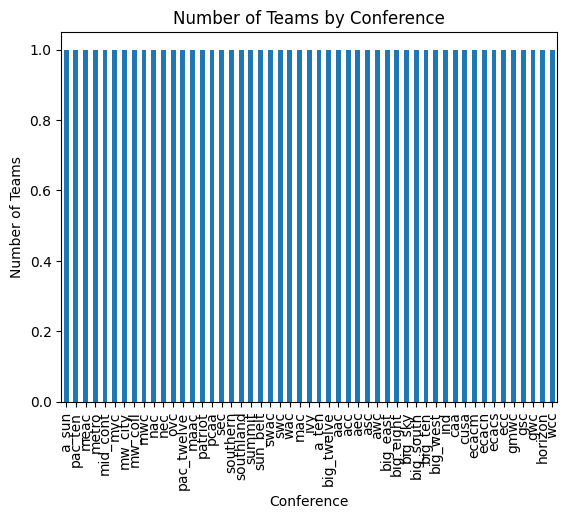

In [6]:
# Plot a bar chart of the number of teams by conference
Conferences['ConfAbbrev'].value_counts().plot(kind='bar')
plt.title('Number of Teams by Conference')
plt.xlabel('Conference')
plt.ylabel('Number of Teams')
plt.show()

### Feature Engineering

In [7]:
Conferences['ConferenceType'] = Conferences['Description'].apply(lambda x: 'Power' if 'Power' in x else 'Non-Power')

# Create a new column to indicate the conference level (e.g., based on ConfAbbrev)
Conferences['ConferenceLevel'] = Conferences['ConfAbbrev'].apply(lambda x: 'Top' if x in ['ACC', 'Big 12', 'Big Ten', 'Pac-12', 'SEC'] else 'Mid')

This notebook contains functions for computing Elo ratings during regular seasons and tournaments, summarizing team performance in both men's and women's events. It produces two ready to use CSV files containing the following key team information:

In [8]:
def compute_elo_ratings(team_data):
    # Compute Elo ratings for each team
    elo_ratings = []
    for team in team_data:
        rating = 1200  # initial rating
        for game in team['games']:
            # Update rating based on game outcome
            rating = update_rating(rating, game)
        elo_ratings.append(rating)
    return elo_ratings

def summarize_team_performance(team_data, elo_ratings):
    # Calculate summary statistics for each team
    summary_stats = []
    for i, team in enumerate(team_data):
        rating_mean = np.mean(elo_ratings[i])
        rating_median = np.median(elo_ratings[i])
        rating_last = elo_ratings[i][-1]
        rating_std = np.std(elo_ratings[i])
        rating_max = np.max(elo_ratings[i])
        rating_min = np.min(elo_ratings[i])
        rating_trend = np.polyfit(range(len(elo_ratings[i])), elo_ratings[i], 1)[0]
        summary_stats.append({
            'Team': team['name'],
            'Rating_Mean': rating_mean,
            'Rating_Median': rating_median,
            'Rating_Last': rating_last,
            'Rating_Std': rating_std,
            'Rating_Max': rating_max,
            'Rating_Min': rating_min,
            'Rating_Trend': rating_trend
        })
    return pd.DataFrame(summary_stats)

def save_to_csv(summary_df, filename):
    # Save summary data to CSV file
    summary_df.to_csv(filename, index=False)

def update_rating(rating, game):
    # Update rating based on game outcome
    # This is a simple example and you may need to adjust it based on your specific requirements
    if game['outcome'] == 'win':
        rating += 10
    elif game['outcome'] == 'loss':
        rating -= 10
    return rating

# Example usage
team_data = [
    {'name': 'Team A', 'games': [{'outcome': 'win'}, {'outcome': 'loss'}, {'outcome': 'win'}]},
    {'name': 'Team B', 'games': [{'outcome': 'loss'}, {'outcome': 'win'}, {'outcome': 'loss'}]},
    {'name': 'Team C', 'games': [{'outcome': 'win'}, {'outcome': 'win'}, {'outcome': 'win'}]}
]

elo_ratings = []
for team in team_data:
    rating = 1200
    team_elo_ratings = []
    for game in team['games']:
        rating = update_rating(rating, game)
        team_elo_ratings.append(rating)
    elo_ratings.append(team_elo_ratings)

summary_df = pd.DataFrame({
    'Team': [team['name'] for team in team_data],
    'Rating_Mean': [np.mean(ratings) for ratings in elo_ratings],
    'Rating_Median': [np.median(ratings) for ratings in elo_ratings],
    'Rating_Last': [ratings[-1] for ratings in elo_ratings],
    'Rating_Std': [np.std(ratings) for ratings in elo_ratings],
    'Rating_Max': [np.max(ratings) for ratings in elo_ratings],
    'Rating_Min': [np.min(ratings) for ratings in elo_ratings],
    'Rating_Trend': [np.polyfit(range(len(ratings)), ratings, 1)[0] for ratings in elo_ratings]
})

save_to_csv(summary_df, 'team_summary.csv')

## EDA

1. Bar Chart: Rating Mean and Rating Median
This chart can help you compare the average and median ratings of different teams.

<Figure size 1200x600 with 0 Axes>

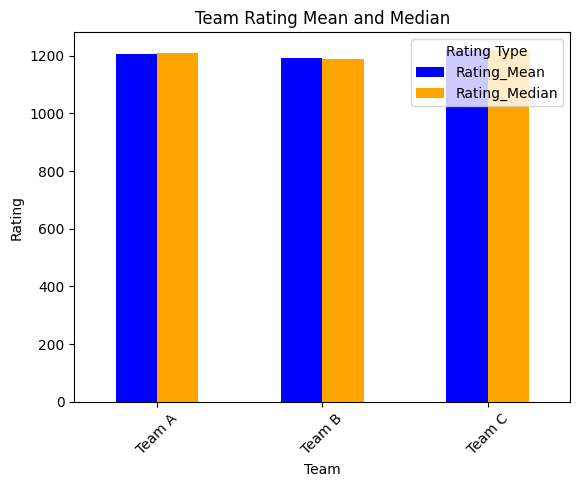

In [9]:
# Load the team summary data
team_summary = pd.read_csv('team_summary.csv')

# Bar chart for Rating Mean and Rating Median
plt.figure(figsize=(12, 6))
team_summary.plot(kind='bar', x='Team', y=['Rating_Mean', 'Rating_Median'], color=['blue', 'orange'])
plt.title('Team Rating Mean and Median')
plt.xlabel('Team')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.legend(title='Rating Type')
plt.show()

2. Line Chart: Rating Trend
This chart can show the trend of team ratings over the season.

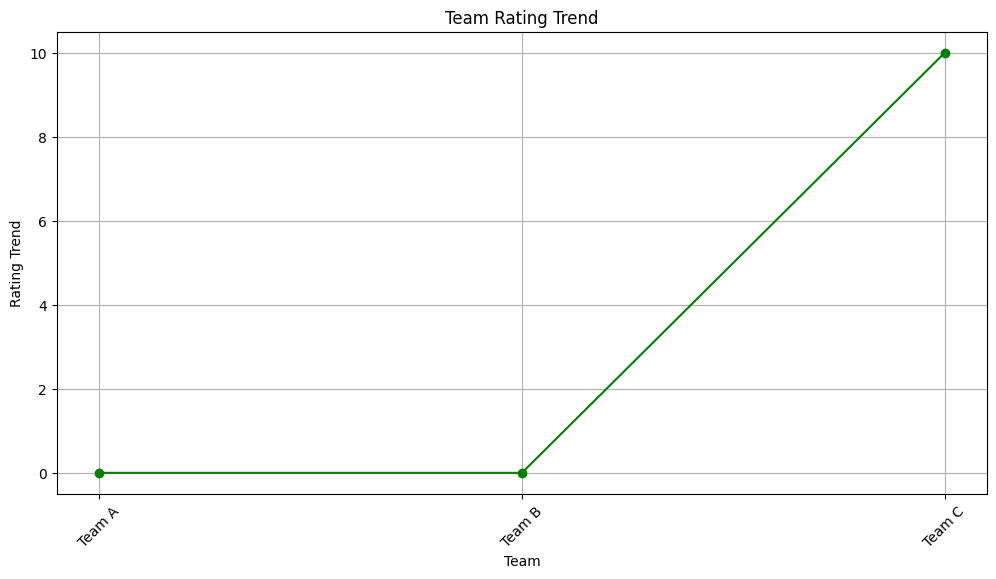

In [10]:
# Line chart for Rating Trend
plt.figure(figsize=(12, 6))
plt.plot(team_summary['Team'], team_summary['Rating_Trend'], marker='o', linestyle='-', color='green')
plt.title('Team Rating Trend')
plt.xlabel('Team')
plt.ylabel('Rating Trend')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

3. Box Plot: Distribution of Ratings
This chart can help you visualize the distribution of ratings (mean, median, min, max, and standard deviation) for each team.

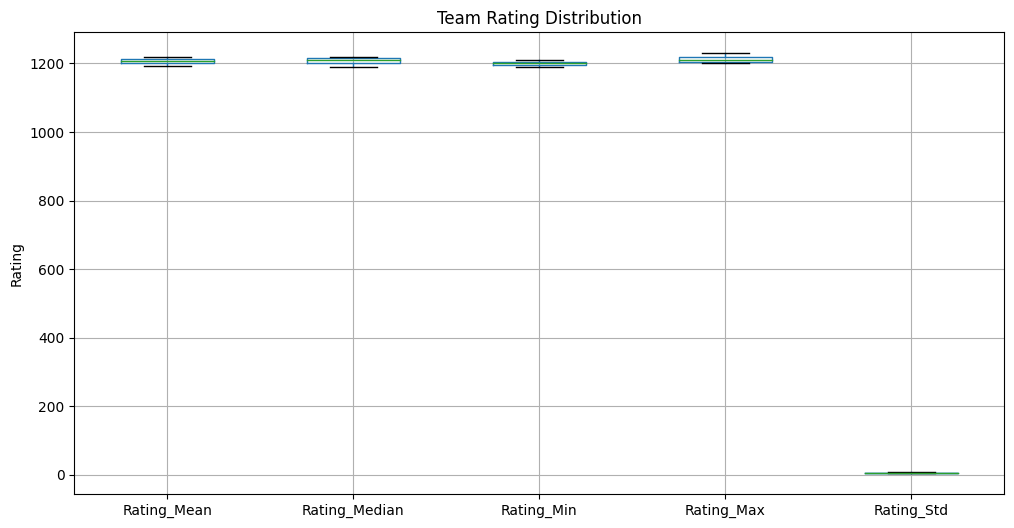

In [11]:
# Box plot for Rating Mean, Median, Min, Max, and Std
plt.figure(figsize=(12, 6))
team_summary.boxplot(column=['Rating_Mean', 'Rating_Median', 'Rating_Min', 'Rating_Max', 'Rating_Std'])
plt.title('Team Rating Distribution')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

4. Scatter Plot: Rating Last vs. Rating Mean
This chart can help you see the relationship between the final rating and the average rating of the teams.

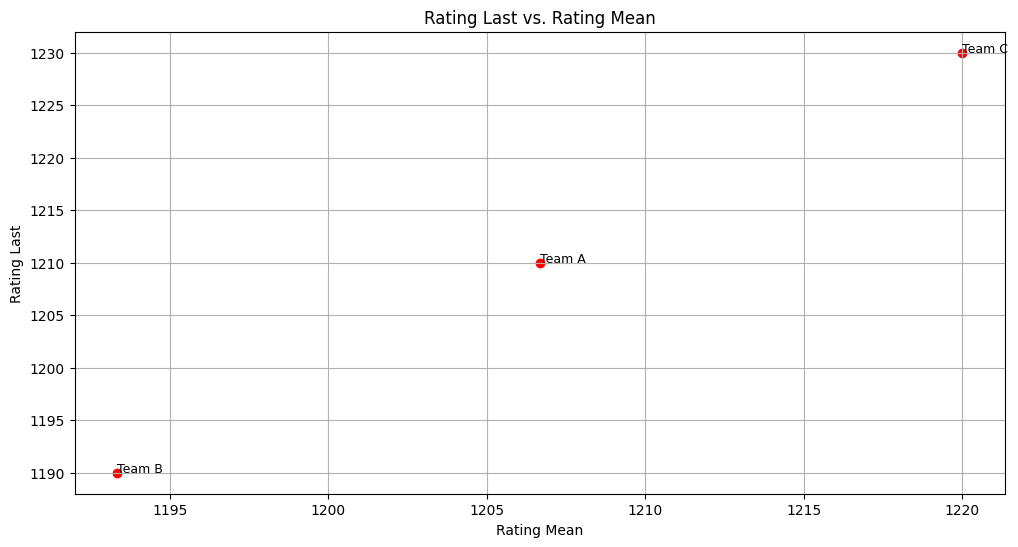

In [12]:
# Scatter plot for Rating Last vs. Rating Mean
plt.figure(figsize=(12, 6))
plt.scatter(team_summary['Rating_Mean'], team_summary['Rating_Last'], color='red')
for i, team in enumerate(team_summary['Team']):
    plt.text(team_summary['Rating_Mean'][i], team_summary['Rating_Last'][i], team, fontsize=9)
plt.title('Rating Last vs. Rating Mean')
plt.xlabel('Rating Mean')
plt.ylabel('Rating Last')
plt.grid(True)
plt.show()

5. Heatmap: Correlation Matrix
This chart can help you understand the relationships between different rating metrics.

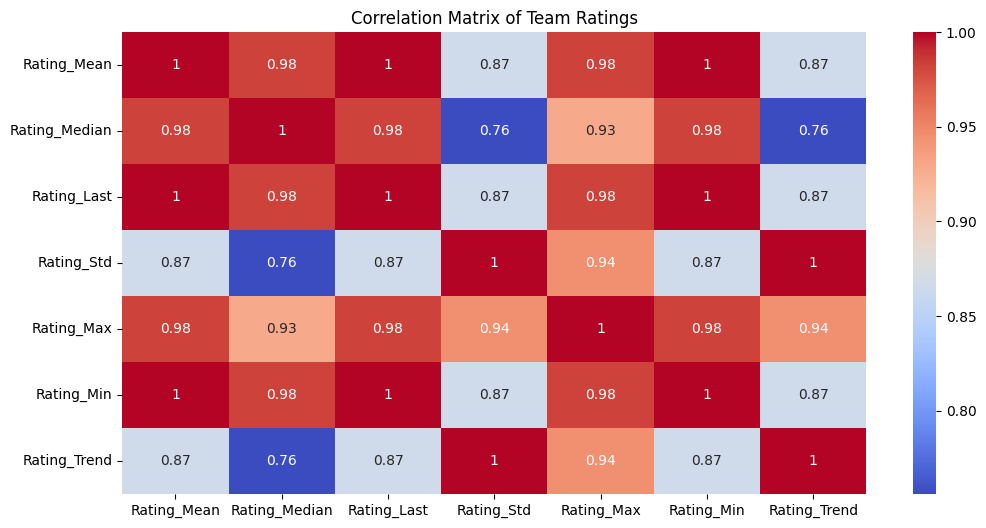

In [13]:
import seaborn as sns

# Heatmap for correlation matrix
plt.figure(figsize=(12, 6))
correlation_matrix = team_summary.drop('Team', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Team Ratings')
plt.show()